<h1><font color="#113D68" size=6>Improving Deep Learning by Exploiting Synthetic Images</font></h1>

<h1><font color="#113D68" size=5>Part 2. Vision Transformers (ViT)</font></h1>

<h1><font color="#113D68" size=4>Multi-head Attention Block</font></h1>

<br><br>
<div style="text-align: right">
<font color="#113D68" size=3>Manuel Castillo Cara</font><br>
<font color="#113D68" size=3>Raúl García-Castro</font><br>
<font color="#113D68" size=3>Jiayun Liu</font><br>
</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Licencia</font></h2>

<p><small><small>Improving Deep Learning by Exploiting Synthetic Images Copyright 2024 Manuel Castillo Cara.</p>
<p><small><small> Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at </p>
<p><small><small> <a href="https://www.apache.org/licenses/LICENSE-2.0">https://www.apache.org/licenses/LICENSE-2.0</a> </p>
<p><small><small> Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License. </p>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
El código de este tutorial ha sido sacado del [GitHub minGPT](https://github.com/karpathy/minGPT/blob/master/mingpt/model.py)

---

<a id="indice"></a>
<h2><font color="#004D7F" size=6>Índice</font></h2>

* [1. Definición, fortalezas y debilidades](#section1)
    * [1.1. Multi-head Attention en Vision Transformer (ViT)](#section12)
    * [1.2. Componentes en Multi-head Attention](#section12)
    * [1.3. Fortalezas y Debilidades](#section13)
* [2. Dataset](#section2)
* [3. Multilayer Perceptron](#section3)
* [4. El Modelo Multi-Head Attention](#section4)
    * [4.1. Módulo self-attention](#section41)
    * [4.2. Módulo multi-head attentions](#section42)
    * [4.3. Clasicador MLP](#section43)
* [5. Entrenamiento y evaluación del modelo](#section5)
---

<a id="section1"></a>
# <font color="#004D7F" size=6> 1. Definición, fortalezas y debilidades</font>

Los Vision Transformer (ViT) son una adaptación del modelo Transformer, originalmente diseñado para tareas de procesamiento de lenguaje natural, aplicado a tareas de visión por computadora. En lugar de procesar secuencias de palabras, los ViT dividen una imagen en **patchs** y procesan estos patchs como **secuencias de tokens**. Al hacerlo, pueden capturar dependencias globales entre los patchs de la imagen y han demostrado ser eficaces en tareas como la clasificación de imágenes, la detección de objetos y más.

<figure><center>
  <img src="../img/vit.png" width="450" height="250" alt="Gráfica">
  <figcaption><blockquote>Arquitectura de ViT y del Trasformer Encoder. Extraída de <a href="https://arxiv.org/abs/2010.11929">artículo de ViT</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información se recomienda la lectura del artículo [ViT](https://arxiv.org/abs/2010.11929)

<a id="section11"></a>
# <font color="#004D7F" size=5> 1.1. Multi-head Attention en Vision Transformer (ViT)</font>

La atención multi-cabeza (multi-head attention) es un mecanismo de atención utilizado en los transformers, incluido el Vision Transformer (ViT). La idea detrás de la atención multi-cabeza es permitir que el modelo preste atención a diferentes partes de la entrada de manera simultánea, lo que puede mejorar la capacidad del modelo para capturar dependencias complejas en los datos.

En el contexto de los Vision Transformers, la atención multi-cabeza se aplica a las representaciones de los parches de la imagen, que se obtienen mediante la división de la imagen en parches y su transformación a vectores de características. La atención multi-cabeza se calcula aplicando múltiples cabezas de atención en paralelo, cada una de las cuales calcula una distribución de atención sobre los parches de la imagen. Las salidas de cada cabeza de atención se concatenan y se transforman linealmente para producir la salida final de la capa de atención multi-cabeza.

La atención multi-cabeza permite que el modelo capture diferentes relaciones espaciales y semánticas entre los parches de la imagen, lo que puede mejorar la capacidad del modelo para reconocer patrones y objetos en la imagen. Además, la atención multi-cabeza también puede ayudar a reducir la varianza del modelo y mejorar su capacidad de generalización a nuevos datos.

<a id="section12"></a>
# <font color="#004D7F" size=5> 1.2. Componentes en Multi-head Attention</font>

En la clase anterior implementamos el mecanismo de atención básico del *Transforemer*. Sin embargo, vimos que la capacidad de representación de este mecanismo era limitada (al utilizar un solo mecanismo (como si utilizáramos un filtro únicamente en CNN). Para resolver este problema, los autores de [*Attention is all you need*](https://arxiv.org/abs/1706.03762) proponen una mejora conocida como *Multi-head attention*.

<figure><center>
  <img src="../img/head.jpeg" width="250" height="300" alt="Gráfica">
  <figcaption><blockquote>Arquitectura Multi-head attention. Extraída de <a href="https://arxiv.org/abs/1706.03762">Attention Is All You Need</a></blockquote></figcaption>
</center></figure>

Este mecanismo toma inspiración en el uso de múltiples filtros en una red convolucional para mejorar la capacidad de representación de datos. En el contexto de atención, esto se traduce en repetir un número determinado de veces (*heads* o cabezas) el mecanismo de *scaled-dot product attention* que conocemos del post anterior.

$$MultiHead(Q,K,V)= Concat(head_1, ..., head_h) W^o$$

donde

$$ head_i = Attention(QW_q^i, KW_k^i, VW_v^i) $$

A grandes rasgos, repetimos el mecanismo de atención aplicando diferentes proyecciones a la hora de obtener nuestras *queries*, *keys* y *values*. Una vez aplicada la atención a cada cabeza, concatenamos los resultados y aplicamos una nueva capa lineal (un MLP) para obtener el resultado final.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
Más información se recomienda la lectura del artículo [Attention Is All You Need](https://arxiv.org/abs/1706.03762)

<a id="section13"></a>
# <font color="#004D7F" size=5> 1.3. Fortalezas y debilidades</font>

Las fortalezas de la atención multi-cabeza (multi-head attention) en los transformers para visión son:

1. Capacidad para procesar múltiples subespacios de representación: La atención multi-cabeza permite que el modelo aprenda diferentes subespacios de representación para diferentes cabezas de atención. Esto puede ser útil para capturar diferentes tipos de patrones y relaciones en la entrada.
2. Mejora la estabilidad del gradiente: La atención multi-cabeza puede ayudar a estabilizar el gradiente durante el entrenamiento, lo que puede mejorar la convergencia y el rendimiento del modelo.
3. Capacidad para modelar dependencias de largo alcance: La atención multi-cabeza puede modelar dependencias de largo alcance en la entrada, lo que puede ser útil para tareas como el reconocimiento de objetos en imágenes.

Sin embargo, la atención multi-cabeza también tiene algunas debilidades:

1. Aumento de la complejidad computacional: La atención multi-cabeza puede ser computacionalmente costosa, especialmente para conjuntos de datos grandes y modelos con muchas capas y cabezas de atención.
2. Dificultad para interpretar: La atención multi-cabeza puede ser difícil de interpretar y comprender, lo que puede dificultar la depuración y el ajuste fino del modelo.
3. Posible sobreajuste: Si el modelo tiene demasiadas cabezas de atención, puede ser propenso al sobreajuste y tener un rendimiento pobre en conjuntos de datos de validación y prueba.

<a id="section2"></a>
# <font color="#004D7F" size=6> 2. Dataset</font>

Utilizamos el dataset de las clases anteriores con las mismas características.

In [2]:
import os
import math
import random
import tensorflow as tf
import pytorch_lightning as pl
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F
from sklearn.datasets import fetch_openml
import numpy as np
from torch.utils.data import DataLoader

# SET RANDOM SEED FOR REPRODUCIBILITY
SEED = 420
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
#torch.backends.cudnn.deterministic = True
#torch.backends.cudnn.benchmark = False
os.environ['PYTHONHASHSEED']=str(SEED)
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)

torch.device("mps")
device = torch.device('mps' if torch.backends.mps.is_available() else 'cpu')
print(device)

/Users/manwest/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


mps


In [3]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y.astype(int)

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    return torch.tensor(self.X.iloc[ix]).float(), torch.tensor(self.y.iloc[ix]).long()

class MNISTDataModule(pl.LightningDataModule):

    def __init__(self, batch_size: int = 64, Dataset = Dataset):
        super().__init__()
        self.batch_size = batch_size
        self.Dataset = Dataset

    def setup(self, stage=None):
        mnist = fetch_openml('mnist_784', version=1)
        X, y = mnist["data"], mnist["target"]
        X_train, X_test, y_train, y_test = X[:60000] / 255., X[60000:] / 255., y[:60000], y[60000:]
        self.train_ds = self.Dataset(X_train, y_train)
        self.val_ds = self.Dataset(X_test, y_test)

    def train_dataloader(self):
        return DataLoader(self.train_ds, batch_size=self.batch_size, shuffle=True)

    def val_dataloader(self):
        return DataLoader(self.val_ds, batch_size=self.batch_size)

In [4]:
dm = MNISTDataModule()
dm.setup()
imgs, labels = next(iter(dm.train_dataloader()))
imgs.shape, labels.shape

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_8527/3171852981.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float(), torch.tensor(self.y.iloc[ix]).long()


(torch.Size([64, 784]), torch.Size([64]))

Procedemos a visualizar.

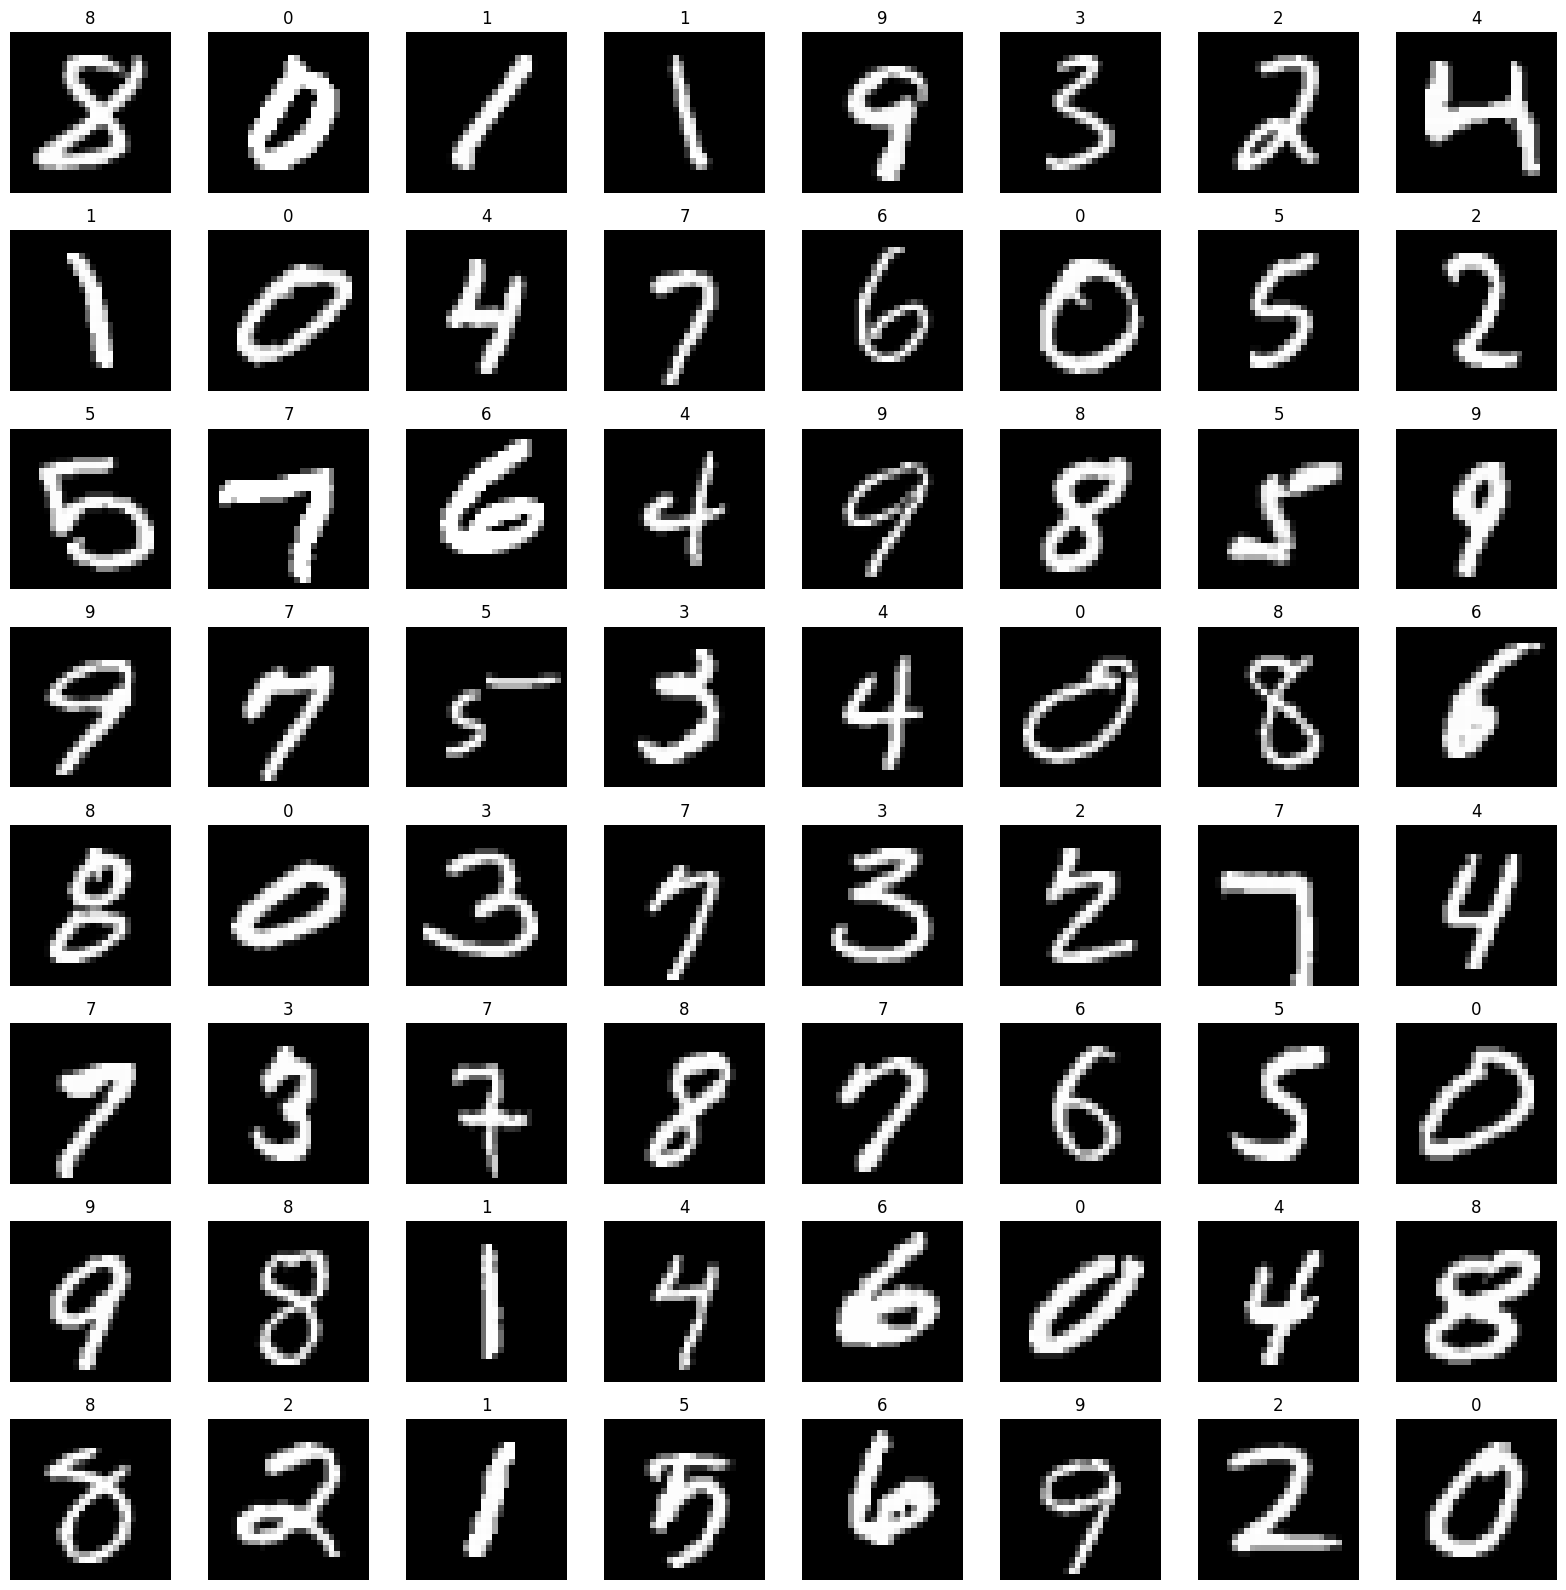

In [5]:
r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax.set_title(label.item())
plt.tight_layout()
plt.show()

<a id="section3"></a>
# <font color="#004D7F" size=6> 3. Multilayer Perceptron</font>

Este código define una clase `MLP` que hereda de `pl.LightningModule` de PyTorch Lightning. Esta clase define una red neuronal multicapa (MLP) básica para la clasificación de imágenes.

En el constructor de la clase, se define la red neuronal como una secuencia de capas utilizando `torch.nn.Sequential`. La red consta de dos capas lineales (`torch.nn.Linear`) con una capa de activación ReLU (`torch.nn.ReLU`) entre ellas. La entrada a la red es una imagen aplanada de 28x28 píxeles (784 en total), y la salida es un vector de probabilidades para cada una de las 10 clases de dígitos.

El método `forward` define el flujo de la red neuronal. La entrada se pasa a través de la red neuronal secuencial definida en el constructor, y se devuelve la salida.

En resumen, este código define una red neuronal multicapa básica para la clasificación de imágenes utilizando PyTorch Lightning. La clase `MLP` define la red neuronal, las pérdidas y métricas de evaluación, y los pasos de entrenamiento y validación. El optimizador también se define en la clase.

In [6]:
class MLP(pl.LightningModule):

    def __init__(self):
        super().__init__()
        self.mlp = torch.nn.Sequential(
            torch.nn.Linear(784, 784),
            torch.nn.ReLU(inplace=True),
            torch.nn.Linear(784, 10)
        )

    def forward(self, x):
        return self.mlp(x)

    def predict(self, x):
        with torch.no_grad():
          y_hat = self(x)
          return torch.argmax(y_hat, axis=1)

    def compute_loss_and_acc(self, batch):
        x, y = batch
        y_hat = self(x)
        loss = F.cross_entropy(y_hat, y)
        acc = (torch.argmax(y_hat, axis=1) == y).sum().item() / y.shape[0]
        return loss, acc

    def training_step(self, batch, batch_idx):
        loss, acc = self.compute_loss_and_acc(batch)
        self.log('loss', loss)
        self.log('acc', acc, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        loss, acc = self.compute_loss_and_acc(batch)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.003)
        return optimizer

La salida de la red `MLP` es un tensor de tamaño `(batch_size, 10)`, donde `batch_size` es el número de muestras en el lote de entrada y `10` es el número de clases de salida (dígitos del 0 al 9 en el caso de MNIST).

Se pasa un tensor aleatorio de tamaño `(64, 784)` a la red `MLP`, donde `64` es el tamaño del lote y `784` son las características de entrada (imágenes aplanadas de 28x28 píxeles). Por lo tanto, la salida de la red tendrá un tamaño de `(64, 10)`.
 
Así, verificamos el correcto funcionamiento de este primer modelo.

In [9]:
mlp = MLP()
outuput = mlp(torch.randn(64, 784)).to(device)
outuput.shape

torch.Size([64, 10])

Ejecutamos el modelo MLP.

In [10]:
mlp = MLP().to(device)
trainer = pl.Trainer(max_epochs=5, logger=None)
trainer.fit(mlp, dm)

[MacBook-Pro-de-Manu.local:08527] shmem: mmap: an error occurred while determining whether or not /var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T//ompi.MacBook-Pro-de-Manu.501/jf.0/2797731840/sm_segment.MacBook-Pro-de-Manu.501.a6c20000.0 could be created.
GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type       | Params
------------------------------------
0 | mlp  | Sequential | 623 K 
------------------------------------
623 K     Trainable params
0         Non-trainable params
623 K     Total params
2.493     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_8527/3171852981.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float(), torch.tensor(self.y.iloc[ix]).long()


/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 4: 100%|██████████| 938/938 [04:38<00:00,  3.36it/s, v_num=14, acc=1.000, val_loss=0.103, val_acc=0.973] 

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 938/938 [04:38<00:00,  3.36it/s, v_num=14, acc=1.000, val_loss=0.103, val_acc=0.973]


Obtenemos una precisión en los datos de validación del 97%, nada impresionante debido a la simplicidad del modelo.

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_8527/3171852981.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return torch.tensor(self.X.iloc[ix]).float(), torch.tensor(self.y.iloc[ix]).long()


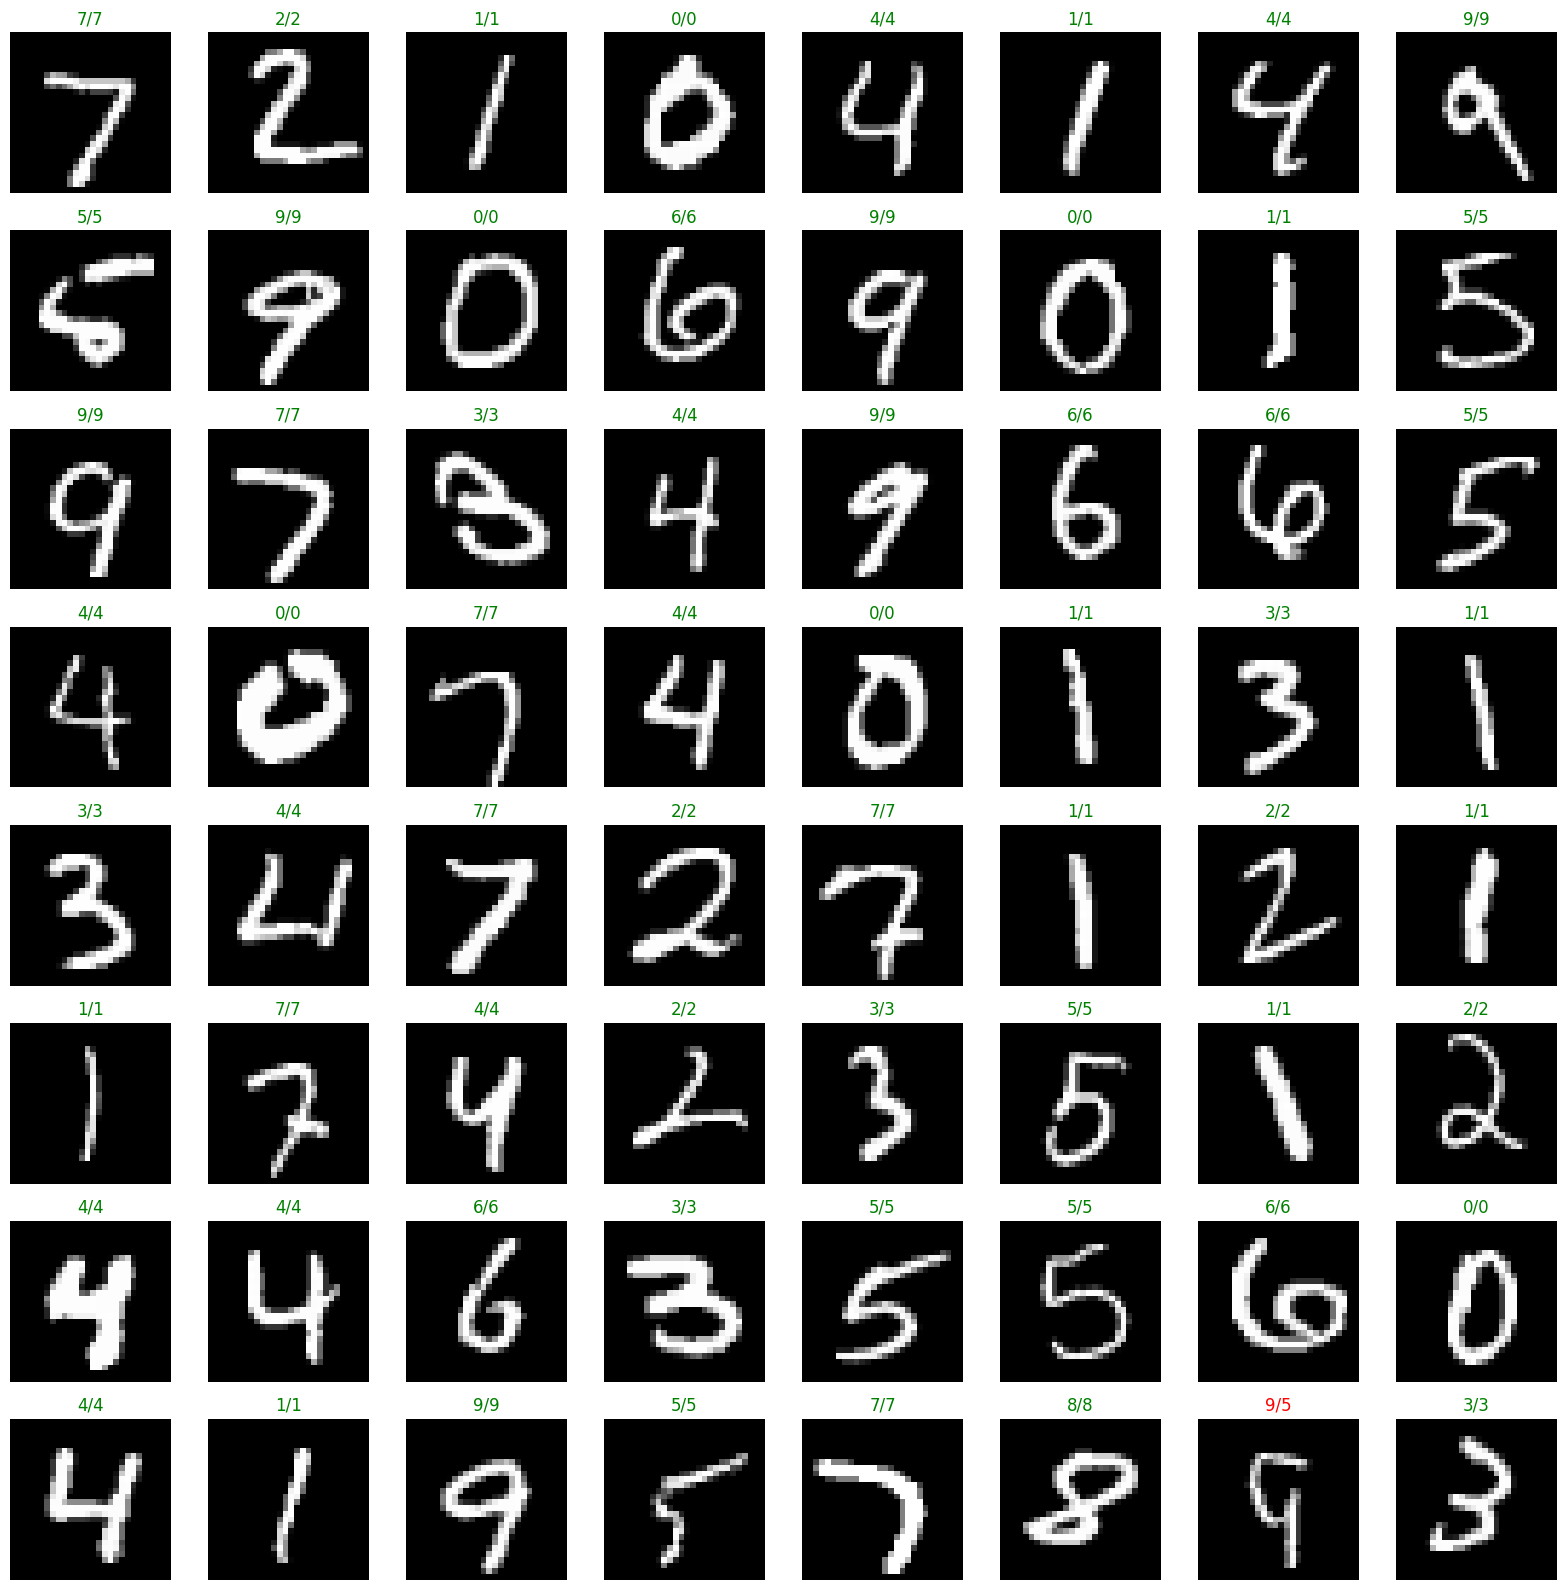

In [11]:
imgs, labels = next(iter(dm.val_dataloader()))
preds = mlp.predict(imgs)

r, c = 8, 8
fig = plt.figure(figsize=(2*c, 2*r))
for _r in range(r):
    for _c in range(c):
        ix = _r*c + _c
        ax = plt.subplot(r, c, ix + 1)
        img, label = imgs[ix], labels[ix]
        ax.axis("off")
        ax.imshow(img.reshape(28,28), cmap="gray")
        ax.set_title(f'{label.item()}/{preds[ix].item()}', color="green" if label == preds[ix] else 'red')
plt.tight_layout()
plt.show()

<a id="section4"></a>
# <font color="#004D7F" size=6> 4. El Modelo Multi-Head Attention</font>

Vamos ahora a resolver el problema utilizando el mecanismo de atención. Lo primero que tenemos que tener en cuenta es que los mecanismos de atención funcionan con conjuntos de vectores (secuencia), por lo que tenemos que reinterpretar nuestras imágenes. Para ello, vamos a dividirlas en 16 *patches* de 7x7. De esta manera, nuestras imágenes ahora serán secuencias de *patches* con las que nuestro mecanismo de atención podrá trabajar. 

**Importante**: 16x7x7 = 784 que es igual al tamaño total de píxeles de las imágenes donde 28x28=784.

<a id="section41"></a>
# <font color="#004D7F" size=5> 4.1. Módulo self attention</font>

Este código define una clase `AttnDataset` que hereda de la clase `torch.utils.data.Dataset` y se utiliza para cargar y procesar los datos de entrada y etiquetas correspondientes para un modelo de atención.

La clase `AttnDataset` tiene un constructor que toma tres argumentos: 
- El argumento `X` representa los datos de entrada, 
- `y` representa las etiquetas correspondientes y 
- `patch_size` es el tamaño del parche que se utilizará para dividir las imágenes de entrada en parches más pequeños.
    - Tendremos 16 parches (4x4) ya que al divivir 28 (pixels de la imagen) entre 7 parches
    - Al aplanar cada parche a un vector tendríamos 49 valores (7x7 cada parche)

La clase tiene tres métodos especiales: 
- El método `__len__` devuelve la longitud del conjunto de datos, 
- El método `__getitem__` devuelve un elemento del conjunto de datos en el índice especificado. 
    - Además, divide la imagen de entrada en parches más pequeños utilizando la función `unfold` de PyTorch, aplana los parches en una sola fila y devuelve los parches y la etiqueta correspondiente como tensores.
 

Este enfoque de dividir las imágenes en parches más pequeños se utiliza comúnmente en ViT, ya que permite que el modelo preste atención a diferentes partes de la imagen de entrada y aprenda a combinar la información de estas partes para generar una representación más precisa de la imagen completa.

 <figure><center>
  <img src="../img/selfattention3.png" width="350" height="200" alt="Gráfica">
  <figcaption><blockquote>Proyección de operaciones en self-attention. Extraída de <a href="https://medium.com/@saba99/self-attention-0b21baad0a48">Medium</a></blockquote></figcaption>
</center></figure>

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i>
💡 Este código es igual qeu el de la sesión anterior

In [21]:
class AttnDataset(torch.utils.data.Dataset):
  def __init__(self, X, y, patch_size=(7, 7)):
    self.X = X
    self.y = y.astype('int')
    self.patch_size = patch_size

  def __len__(self):
    return len(self.X)

  def __getitem__(self, ix):
    image = torch.tensor(self.X.iloc[ix]).float().view(28, 28) # 28 x 28
    h, w = self.patch_size
    patches = image.unfold(0, h, h).unfold(1, w, w) # 4 x 4 x 7 x 7
    patches = patches.contiguous().view(-1, h*w) # 16 x 49
    return patches, torch.tensor(self.y.iloc[ix]).long()

In [22]:
attn_dm = MNISTDataModule(Dataset = AttnDataset)
attn_dm.setup()
imgs, labels = next(iter(attn_dm.train_dataloader()))
imgs.shape, labels.shape

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_8527/1479043640.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = torch.tensor(self.X.iloc[ix]).float().view(28, 28) # 28 x 28


(torch.Size([64, 16, 49]), torch.Size([64]))

Veamos una muestra de cómo queda una imagen en patchs de 4x4

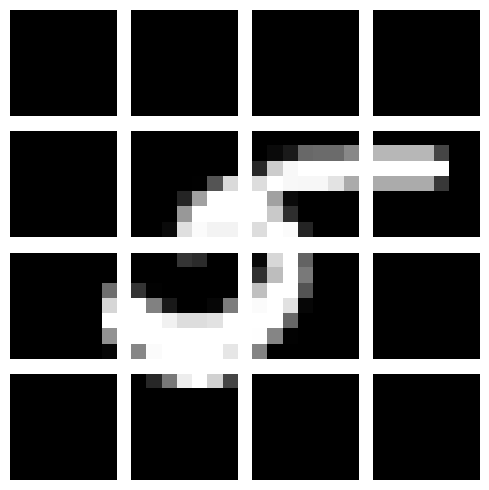

In [23]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(5,5))
for i in range(4):
    for j in range(4):
        ax = plt.subplot(4, 4, i*4 + j + 1)
        ax.imshow(imgs[6,i*4 + j].view(7, 7), cmap="gray")
        ax.axis('off')
plt.tight_layout()
plt.show()

<a id="section42"></a>
# <font color="#004D7F" size=5> 4.2. Módulo multi-head attention</font>

Debido a la baja dimensionalidad de nuestro ejemplo, vamos a repetir nuestro mecanismo de atención básico `n_heads` número de veces. Sin embargo, en la práctica, se divide la dimensión del `embedding` por este número de cabezas. Un detalle importante a tener en cuenta.

La clase MultiHeadAttention implementa la atención multi-cabeza en PyTorch, que es un mecanismo de atención utilizado en los modelos de transformadores para procesar secuencias de entrada y aprender dependencias de largo alcance entre ellas. La clase toma dos argumentos: 
- `n_embd` que es el tamaño de incrustación de entrada y
- `n_heads` que es el número de cabezas de atención.

En el método `__init__`, se definen las proyecciones de clave, consulta y valor mediante capas lineales (`torch.nn.Linear`). También se define una capa lineal adicional para la proyección de salida.

En el método `forward`: 
- Se calculan las matrices de clave, consulta y valor para todas las cabezas de atención en el lote y se mueve la dimensión de la cabeza hacia adelante para ser la dimensión del lote. 
- Luego, se calcula la matriz de atención mediante la multiplicación de matrices de consulta y clave transpuesta, seguida de una normalización de softmax.
- La salida de la atención se calcula mediante la multiplicación de matrices de la matriz de atención y la matriz de valor. 
- Finalmente, las salidas de todas las cabezas de atención se ensamblan y se pasan a través de la capa de proyección de salida.

In [24]:
class MultiHeadAttention(torch.nn.Module):

    def __init__(self, n_embd, n_heads):
        super().__init__()
        self.n_heads = n_heads # Definimos el número de cabezas (esto es lo número)

        # key, query, value projections
        # Ahora las multiplicamos con tantas cabezas como hayamos definido
        # En la representación original realiza una división pero al ser tan pequeñas las imágenes habría poca informació
        self.key = torch.nn.Linear(n_embd, n_embd*n_heads)
        self.query = torch.nn.Linear(n_embd, n_embd*n_heads)
        self.value = torch.nn.Linear(n_embd, n_embd*n_heads)

        # output projection que lo proyectamos a la dimensión original
        self.proj = torch.nn.Linear(n_embd*n_heads, n_embd)

    def forward(self, x):
        B, L, F = x.size()
        
        # Todas estas operaciones xon únicamente para que las dimensiones encajen en todo el proceso de atención
        # calculate query, key, values for all heads in batch and move head forward to be the batch dim
        k = self.key(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)
        q = self.query(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)
        v = self.value(x).view(B, L, F, self.n_heads).transpose(1, 3) # (B, nh, L, F)

        # attention (B, nh, L, F) x (B, nh, F, L) -> (B, nh, L, L)
        att = (q @ k.transpose(-2, -1)) * (1.0 / math.sqrt(k.size(-1)))
        att = torch.nn.functional.softmax(att, dim=-1)
        y = att @ v # (B, nh, L, L) x (B, nh, L, F) -> (B, nh, L, F)
        y = y.transpose(1, 2).contiguous().view(B, L, F*self.n_heads) # re-assemble all head outputs side by side

        return self.proj(y)

<a id="section43"></a>
# <font color="#004D7F" size=5> 4.3. Clasicador MLP</font>


La clase `Model` hereda de la clase `MLP` y define un modelo de transformador para la clasificación de imágenes. La clase toma tres argumentos: 
- `n_embd` que es el tamaño de incrustación de entrada, 
- `seq_len` que es la longitud de la secuencia de entrada y 
- `n_heads` que es el número de cabezas de atención.

En el método `__init__`, se define la capa de atención multi-cabeza, una capa de activación ReLU y una capa lineal para la clasificación.

En el método `forward`, se pasa la entrada a través de la capa de atención multi-cabeza, seguida de la capa de activación ReLU y la capa lineal para obtener la salida del modelo.

In [29]:
class Model(MLP):

    def __init__(self, n_embd=7*7, seq_len=4*4, n_heads=4*4):
        super().__init__()
        self.mlp = None

        self.attn = MultiHeadAttention(n_embd, n_heads)
        self.actn = torch.nn.ReLU(inplace=True)
        self.fc = torch.nn.Linear(n_embd*seq_len, 10)

    def forward(self, x):
        x = self.attn(x)
        #print(x.shape)
        y = self.fc(self.actn(x.view(x.size(0), -1)))
        #print(y.shape)
        return y

<a id="section5"></a>
# <font color="#004D7F" size=6> 5. Entrenamiento y evaluación del modelo</font>

Ahora nuestro modelo tiene mayor capacidad de representación (más parámetros) y, por lo tanto, obtenemos resultados mejores.

In [30]:
import math
model = Model().to(device)
trainer = pl.Trainer(max_epochs=5, logger=None)
trainer.fit(model, attn_dm)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type               | Params
--------------------------------------------
0 | attn | MultiHeadAttention | 156 K 
1 | actn | ReLU               | 0     
2 | fc   | Linear             | 7.9 K 
--------------------------------------------
163 K     Trainable params
0         Non-trainable params
163 K     Total params
0.656     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_8527/1479043640.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = torch.tensor(self.X.iloc[ix]).float().view(28, 28) # 28 x 28


/Users/manwest/Library/Python/3.9/lib/python/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:441: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 4: 100%|██████████| 938/938 [04:46<00:00,  3.28it/s, v_num=18, acc=0.969, val_loss=0.118, val_acc=0.966]

`Trainer.fit` stopped: `max_epochs=5` reached.


Epoch 4: 100%|██████████| 938/938 [04:46<00:00,  3.28it/s, v_num=18, acc=0.969, val_loss=0.118, val_acc=0.966]


Hemos visto como mejorar el mecanismo de atención añadiendo varias "cabezas" a las cuales atender en paralelo. De esta forma, la capacidad para representar datos de nuestro modelo se ve incrementada. Si bien el mecanismo de *multi-head self attention* es la base del *Transformer*, que veremos en la siguiente sesión.

/var/folders/9h/d3b8zc6j5019cyvmb_h929xm0000gn/T/ipykernel_8527/1479043640.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  image = torch.tensor(self.X.iloc[ix]).float().view(28, 28) # 28 x 28


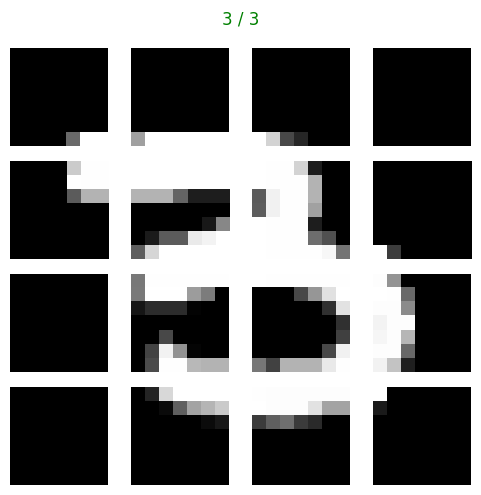

In [34]:
attn_imgs, attn_labels = next(iter(attn_dm.val_dataloader()))
preds = model.predict(attn_imgs)

ix = random.randint(0, dm.batch_size)
fig = plt.figure(figsize=(5,5))
for i in range(4):
    for j in range(4):
        ax = plt.subplot(4, 4, i*4 + j + 1)
        ax.imshow(attn_imgs[ix,i*4 + j].view(7, 7), cmap="gray")
        ax.axis('off')
fig.suptitle(f'{attn_labels[ix]} / {preds[ix].item()}', color="green" if attn_labels[ix] == preds[ix].item() else "red")
plt.tight_layout()
plt.show()